In [2]:
import numpy as np;
import sympy as sym;
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

-----

## Limits at point of discontinuities 


-----

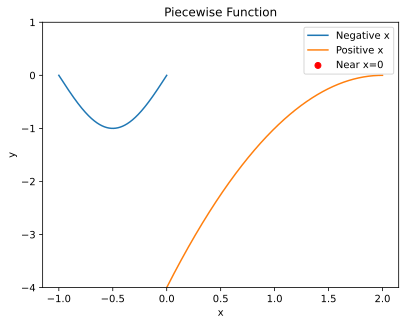

In [3]:
def f(x):
    if isinstance(x, (list, np.ndarray)):
        y = []
        for i in range(len(x)):
            if x[i] < 0:
                y.append(np.sin(x[i] * np.pi))
            elif x[i] > 0:
                y.append(-(x[i] - 2) ** 2)
            elif abs(x[i]) < 1e-6:
                y.append(1.5)
        return np.array(y)
    else:
        if x < 0:
            return np.sin(x * np.pi)
        elif x > 0:
            return -(x - 2) ** 2
        elif abs(x) < 1e-6:
            return 1.5

    
   


xx = np.linspace(-1,+2,6000);

yy = f(xx)


plt.ylim(-4,1)
plt.plot(xx[xx < 0], f(xx[xx < 0]), label='Negative x')  # Plot negative section
plt.plot(xx[xx > 0], f(xx[xx > 0]), label='Positive x')  # Plot positive section
plt.scatter(xx[np.isclose(xx, 0, atol=1e-6)], f(xx[np.allclose(xx, 0, atol=1e-8)]), label='Near x=0', c='red')  # Plot point near 0

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Piecewise Function')
plt.legend()
plt.show()



----

## Estimate <i>lim</i> <sub>x-> 0<sup>+</sup> </sub> $ f(x) $  and   <i>lim</i> <sub>x-> 0<sup>-</sup> </sub> $ f(x) $

-----

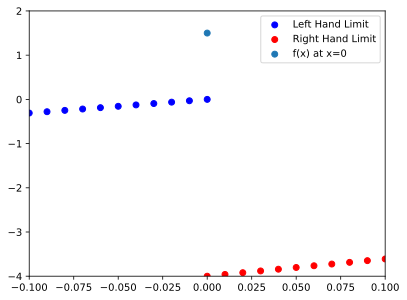

limit approches -5.305810956705069e-13 from the left x->0
lim approhes -3.999999999999324 from right x->0


Function value at x=0 f(0)=1.5


In [4]:
def lim(target,fx,spacing,dir):
  
  x_y_left=[ [(target-10),fx(target-10)]]

  
  x_y_right = [  [(target+10),fx(target+10)]  ]
 
  loop_index = int(10 / spacing)

  for i in range(loop_index):
     x_value_left = x_y_left[-1][0] + spacing;
     x_y_left.append([x_value_left,fx(x_value_left)])
     
     x_value_right = x_y_right[-1][0] - spacing;
     x_y_right.append([x_value_right,fx(x_value_right)])
  
  if(dir=='+'):
     return x_y_right;

  elif(dir=='-'):
     return x_y_left
  else:
     if(dir=='+-'):
        return {
           "left":x_y_left,
           "Right":x_y_right
        }
     else:
        print("inacceptable direction")
        return None;
      
        
target = 0;
spacing = 0.01;

left_hand_limit = lim(target,f,spacing,dir='-')     
right_hand_limit = lim(target,f,spacing,dir='+')

plt.xlim(-0.1,0.1)
plt.ylim(-4,2)

for i in range(len(left_hand_limit)):
   plt.scatter(left_hand_limit[i][0],left_hand_limit[i][1],color='blue',label='Left Hand Limit' if i == 0 else None)
   plt.scatter(right_hand_limit[i][0],right_hand_limit[i][1],color='red',label='Right Hand Limit' if i == 0 else None)

plt.scatter(target,f(target),label="f(x) at x=0")

plt.legend()
plt.show()
   
print(f"limit approches {left_hand_limit[-1][1]} from the left x->0")
print(f"lim approhes {right_hand_limit[-1][1]} from right x->0")
print("\n")
print(f"Function value at x={target} f({target})={f(target)}")


----------

## Exploring Limits at Jump Discontinuity in Sympy

--------

 **This is an Example of how one should stay careful while implementing math in code**

<h2> as seen below sympy engine does evaluate the limits all wrong </h2>

------

In [5]:
from sympy.abc import x


piece1 = sym.sin(sym.pi * x)
piece2 = 1.5
piece3 = -(x - 2) ** 2

fx = sym.Piecewise(
    (piece1, x < 0),
    (piece2, sym.Eq(x, 0)),
    (piece3, x > 0)
)

target = 0

left_hand_limit = sym.limit(fx, x, target, dir='-')
right_hand_limit = sym.limit(fx, x, target, dir='+')

both_sided_limit = sym.limit(fx, x, target, dir='+-')

print(f"Left Hand limit as x-> {target}: {left_hand_limit}")
print(f"Right Hand limit as x-> {target}: {right_hand_limit}")
print(f"Both Sided limit x->{target} :{both_sided_limit}")
print(f"Function value at x = {target} :", fx.subs(x, 0))



Left Hand limit as x-> 0: 3/2
Right Hand limit as x-> 0: 3/2
Both Sided limit x->0 :3/2
Function value at x = 0 : 1.50000000000000


---------


## Exploring infinite discontinuity in Sympy

$ f(x) = 3 / (1-x^2) $


-----

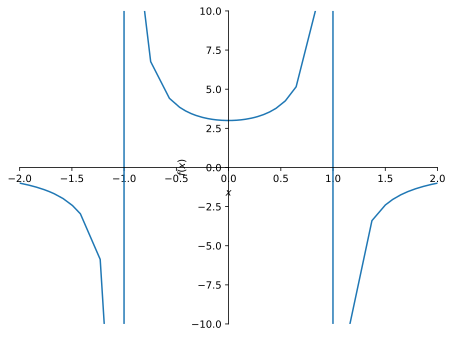

In [6]:
from sympy.plotting import plot

Fx = 3/(1-x**2)
plot(Fx, xlim=(-2, 2), ylim=(-10, 10),n=6000)

target=-1


In [8]:
LHL = sym.limit(Fx,x,target,dir='-')

RHL = sym.limit(Fx,x,(target),dir='+')


print(f"Left hand side limit as x->{target} : {LHL}")
print(f"Right hand side Limit as x->{target} : {RHL}")
print(f"\nFunction value as x ={target} f({target}) : {Fx.subs(x,target)}")

print("Hence the limit does not exist")

Left hand side limit as x->-1 : -oo
Right hand side Limit as x->-1 : oo
Function value as x =-1 f(-1) : zoo


--------

## Exploring OScilating discontinuity in sympy

$ f(x) = sin(x^-1) $
  

----------

Left hand side limit as x->0 : AccumBounds(-1, 1)
Right hand side Limit as x->0 : AccumBounds(-1, 1)


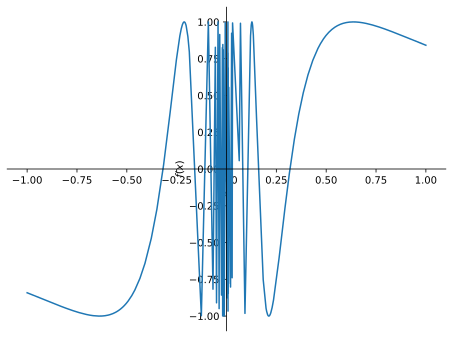

In [15]:

Fx = sym.sin(x**(-1))
target = 0;

left_hand_limit = sym.limit(Fx,x,target,dir='-')

right_hand_limit = sym.limit(Fx,x,target,dir='+')

both_sided_limit = sym.limit(Fx,x,target,dir='+-')

print(f"Left hand side limit as x->{target} : {left_hand_limit}")
print(f"Right hand side Limit as x->{target} : {right_hand_limit}")

sym.plot(Fx,(x,-1,+1))